## Paula Henríquez

## Descripción del problema

El objetivo es predecir la cantidad de **calorías quemadas durante una sesión de entrenamiento** en base a variables fisiológicas de la persona y su comportamiento en el entrenamiento.

El dataset utilizado registra datos detallados de sesiones de entrenamiento pertenecientes a los miembros de un gimnasio.

( https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?resource=download )

In [ ]:
import pandas as pd

df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
# copia de libre trabajo
dfcopia = df.copy()

In [ ]:
# variable objetivo a eliminar: calories_burned
# matriz entrada
x = dfcopia.drop(columns=["Calories_Burned", "Workout_Type"])

In [ ]:
x.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,29.2,2.8,3,1,14.39


## Modelo Aplicado
Para lograr el objetivo, se utilizó un modelo supervisado de **regresión**, utilizando random forest regressor.
Este modelo permite predecir la variable de calorías quemadas.

El entrenamiento y la evaluación se realizó 80/20 respectivamente.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x["Gender"] = LabelEncoder().fit_transform(x["Gender"])

In [ ]:
# variable objetivo, conseguir
y = dfcopia["Calories_Burned"]

In [ ]:
# estandarzicado de variables
escala = StandardScaler()
x_escalado = escala.fit_transform(x)

In [ ]:
# división del entrenamido 80/20
xtrain, xtest, ytrain, ytest = train_test_split(x_escalado, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# entrenamiento
modelo = RandomForestRegressor(random_state=42)
modelo.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# entrenamiento y predicción de y
modelo = RandomForestRegressor(random_state=42)
modelo.fit(xtrain, ytrain)
ypred = modelo.predict(xtest)

In [ ]:
# evaluación
# 1. mean absolute error
mae = mean_absolute_error(ytest, ypred)
# 2. Root Mean Squared Error
mse = mean_squared_error(ytest, ypred)
rmse = mse ** 0.5 # Calculate RMSE by taking the square root of MSE
# 3. Coef. de Determinación (Qué tan bien las predicciones del modelo explican la variación de los datos reales.)
r2 = r2_score(ytest, ypred)

In [ ]:
print(mae)

36.1674358974359


In [ ]:
print(rmse)

47.741778881491534


In [ ]:
print(r2)

0.9726787323916822


## Resultados
- **MAE** : 36 calorías APROX
- **RMSE** : 47.7 calorías APROX
- **R^2** : 0.97, el modelo explica el 97% de la variabilidad en las calorías quemadas

In [ ]:
# analizar la importancia de cada variable
importancia_variables = modelo.feature_importances_

# crear un DataFrame para visualizar la importancia de las variables
importancia_df = pd.DataFrame({'Variable': x.columns, 'Importancia': importancia_variables})

# ordenar las variables por importancia de forma descendente
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

# mostrar la importancia de las variables
print("Importancia de las variables en el modelo:")
display(importancia_df)

Importancia de las variables en el modelo:


,Variable,Importancia
0,Session_Duration (hours),0.834134
1,Avg_BPM,0.099921
2,Age,0.019395
3,Fat_Percentage,0.012871
4,Gender,0.011268
5,Height (m),0.004965
6,Weight (kg),0.004434
7,Water_Intake (liters),0.003310
8,BMI,0.003270
9,Resting_BPM,0.002858


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

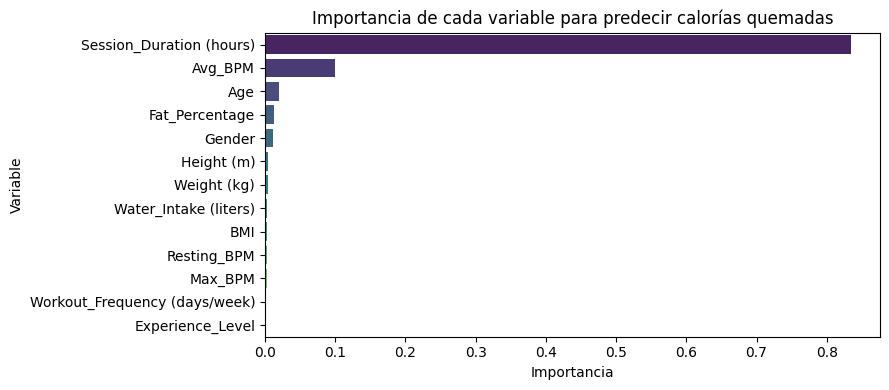

In [ ]:
plt.figure(figsize=(9, 4))
sns.barplot(data=importancia_df, x='Importancia', y='Variable', hue='Variable', palette='viridis', legend=False)
plt.title("Importancia de cada variable para predecir calorías quemadas")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

El análisis de importancia de variables mostró:

- La variable más importante fue la **duración de la sesión**
- Le siguió el **BPM promedio**
- Otras variables como edad, género y grasa corporal aportaron en menor medida

La **duración de la sesión** es la variable que más aporta para determinar cuantas calorías se queman en el entrenamiento, seguido de el promedio de las **pulsaciones por minuto** (BMP). Hay otros factores/variables que también pueden generar una variabilidad en cuanto a la quema de calorías; la edad, grasa corporal y el género (cuestiones fisiologicas).



## Reflexión


1.   ¿Qué aprendí?

  Aprendí a preparar datos para entrenar un modelo supervisado de machine learning, seleccionando variables predictoras, aplicando escalado y evaluando métricas de desempeño del modelo. También comprendí cómo interpretar la importancia de cada variable para el modelo en cuanto a la predicción que este realizó.

2.   ¿Qué fue lo más difícil?

  Decidir qué variables incluir o excluir, su relevancia en el análisis. En lo personal habría esperado que la frecuencia del entrenamiento hubiese tomado un papel con mayor importancia, pero claro, el análisis fue realizado en una sesión.

3. ¿Cómo podría mejorarse?

  Probando otros modelos, tal vez habría otra forma de abordarlo, o incluso podría haber establlecido otro tipo objetivo a partir del mismo archivo. Añadiendo más variables como tipo específico de ejercicios o series.

4. ¿Por qué es necesario usar Machine Learning en este caso?

  Porque las calorías quemadas, que es lo que buscaba, dependen de múltiples factores que no son lineales ni obvios a simple vista. El modelo supervisado de Machine Learning permite que veamos las relaciones complejas y no tan obvias, señalando predicciones útiles para el cumplimiento del objetivo.